In [61]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt



CCLE=pd.read_csv("CCLE_smiles.csv")

GDSC=pd.read_csv("GDSC_smiles.csv")
TGSA_drug_smiles=pd.read_csv("TGSA_drug_smiles.csv")
GDSC



,Unnamed: 0,smiles
0,1242,CCN(CC)CCCCNC1=NC2=NC(=C(C=C2C=N1)C3=CC(=CC(=C...
1,179,CC(CS(=O)(=O)C1=CC=C(C=C1)F)(C(=O)NC2=CC(=C(C=...
2,86,CCCCCCCCCCCC1=C(C(=O)C=C(C1=O)O)O
3,55,C1=C(C(=O)NC(=O)N1)F
4,1001,COC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C(=C3)Br)O...
...,...,...
216,211,CC1=C(C=C(C=C1)NC2=NC=NC(=C2)C3=CC(=CC=C3)N4C(...
217,305,CN1CC2=C(C=CC(=C2)NS(=O)(=O)C3=CC=CC=C3OC)NC1=O
218,1149,C1[C@@H]2CN([C@H]1CN2C3=CC=CC=N3)/C=C/C(=O)C4=...
219,1259,CC1(C(=C)N(C2=CC=CC=C21)CCCCCC(=O)O)C


In [62]:
#CCLE파일의 pubchem종류 개수 확인
CCLE_response=pd.read_csv("CCLE_response.csv")
CCLE_response
unique_pubchem_values = CCLE_response['pubchem'].nunique()
print("'pubchem' 열에 있는 서로 다른 숫자의 개수:", unique_pubchem_values)

'pubchem' 열에 있는 서로 다른 숫자의 개수: 24


In [63]:
average_z_score_by_pubchem = CCLE_response.groupby('pubchem')['Z_SCORE'].mean()

print("pubchem 별 Z_SCORE의 평균:")
print(average_z_score_by_pubchem)

pubchem 별 Z_SCORE의 평균:
pubchem
36314        2.377284
60700        0.951382
60838        1.078628
176870      -0.563609
208908      -0.507602
216239      -0.596397
216345      -0.614246
644241      -0.539070
3081361     -0.222333
5330286     -0.571641
5479543     -0.682832
6505803      1.217326
6918837      1.870111
10117717     0.283318
10127622    -0.090573
10302451    -0.315390
10461815    -0.622130
11476171    -0.294480
11503417    -0.472455
11626560    -0.474633
11656518     0.039729
16038120    -0.130479
24180719    -0.635565
135611162   -0.368637
Name: Z_SCORE, dtype: float64


In [64]:
#CCLE파일과 TGSA파일의 pubchem(CID)가 일치하는 case가 있어서 일치하는 pubchem끼리 병합
merged_df = pd.merge(CCLE_response, TGSA_drug_smiles, left_on='pubchem', right_on='CID', how='inner')
merged_df

,DepMap_ID,pubchem,Z_SCORE,ActArea,drug_name,CID,CanonicalSMILES,IsomericSMILES
0,ACH-000558,644241,-0.955879,0.0000,Nilotinib,644241,CC1=C(C=C(C=C1)C(=O)NC2=CC(=CC(=C2)C(F)(F)F)N3...,CC1=C(C=C(C=C1)C(=O)NC2=CC(=CC(=C2)C(F)(F)F)N3...
1,ACH-000245,644241,-0.955879,0.0000,Nilotinib,644241,CC1=C(C=C(C=C1)C(=O)NC2=CC(=CC(=C2)C(F)(F)F)N3...,CC1=C(C=C(C=C1)C(=O)NC2=CC(=CC(=C2)C(F)(F)F)N3...
2,ACH-000244,644241,-0.955879,0.0000,Nilotinib,644241,CC1=C(C=C(C=C1)C(=O)NC2=CC(=CC(=C2)C(F)(F)F)N3...,CC1=C(C=C(C=C1)C(=O)NC2=CC(=CC(=C2)C(F)(F)F)N3...
3,ACH-000102,644241,-0.955879,0.0000,Nilotinib,644241,CC1=C(C=C(C=C1)C(=O)NC2=CC(=CC(=C2)C(F)(F)F)N3...,CC1=C(C=C(C=C1)C(=O)NC2=CC(=CC(=C2)C(F)(F)F)N3...
4,ACH-000987,644241,-0.955879,0.0000,Nilotinib,644241,CC1=C(C=C(C=C1)C(=O)NC2=CC(=CC(=C2)C(F)(F)F)N3...,CC1=C(C=C(C=C1)C(=O)NC2=CC(=CC(=C2)C(F)(F)F)N3...
...,...,...,...,...,...,...,...,...
3235,ACH-000112,36314,3.870015,7.4525,Paclitaxel,36314,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...
3236,ACH-000611,36314,3.888729,7.4814,Paclitaxel,36314,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...
3237,ACH-000346,36314,3.906343,7.5086,Paclitaxel,36314,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...
3238,ACH-000226,36314,3.970515,7.6077,Paclitaxel,36314,CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...,CC1=C2[C@H](C(=O)[C@@]3([C@H](C[C@@H]4[C@]([C@...


In [65]:
#병합된 파일에서 pubchem별 Z-score의 평균과 TGSA파일의 CanonicalSMILES, IsomericSMILES(화합물 구조)출력
average_z_score_by_pubchem = merged_df.groupby('pubchem')['Z_SCORE'].mean().reset_index()
average_z_score_by_pubchem

result = pd.merge(average_z_score_by_pubchem, TGSA_drug_smiles[['CID', 'CanonicalSMILES', 'IsomericSMILES']], left_on='pubchem', right_on='CID', how='inner')
result
result.drop('CID', axis=1, inplace=True)
print(result)

     pubchem   Z_SCORE                                    CanonicalSMILES  \
0      36314  2.377284  CC1=C2C(C(=O)C3(C(CC4C(C3C(C(C2(C)C)(CC1OC(=O)...   
1      60700  0.951382  CCC1(C2=C(COC1=O)C(=O)N3CC4=CC5=C(C=CC(=C5CN(C...   
2      60838  1.078628  CCC1=C2CN3C(=CC4=C(C3=O)COC(=O)C4(CC)O)C2=NC5=...   
3     176870 -0.563609  COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...   
4     208908 -0.507602  CS(=O)(=O)CCNCC1=CC=C(O1)C2=CC3=C(C=C2)N=CN=C3...   
5     216239 -0.596397  CNC(=O)C1=NC=CC(=C1)OC2=CC=C(C=C2)NC(=O)NC3=CC...   
6     644241 -0.539070  CC1=C(C=C(C=C1)C(=O)NC2=CC(=CC(=C2)C(F)(F)F)N3...   
7    5330286 -0.571641  CC1=C(C(=O)N(C2=NC(=NC=C12)NC3=NC=C(C=C3)N4CCN...   
8   10127622 -0.090573  CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)Cl)C(=...   
9   11626560 -0.474633  CC(C1=C(C=CC(=C1Cl)F)Cl)OC2=C(N=CC(=C2)C3=CN(N...   
10  24180719 -0.635565  CCCS(=O)(=O)NC1=C(C(=C(C=C1)F)C(=O)C2=CNC3=C2C...   

                                       IsomericSMILES  
0   CC1=C2[C@H](C(=

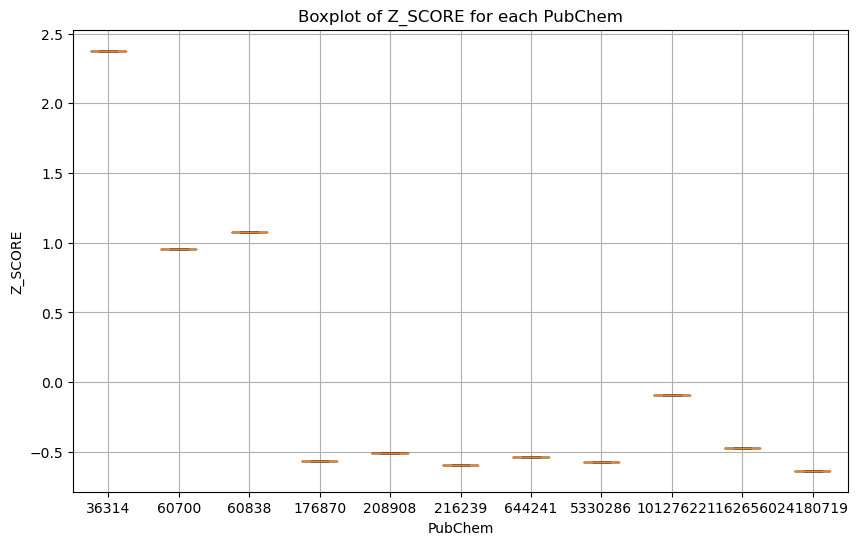

In [66]:
#PubChem별 Z-Score평균 시각화
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
plt.boxplot(result_df.groupby('pubchem')['Z_SCORE'].apply(list).values, labels=result_df['pubchem'].unique())
plt.title('Boxplot of Z_SCORE for each PubChem')
plt.xlabel('PubChem')
plt.ylabel('Z_SCORE')
plt.grid(True)
plt.show()

In [47]:
GDSC=pd.read_csv("GDSC_fitted_dose_response.csv")
GDSC

,DATASET_VERSION,IC50_RESULTS_ID,COSMIC_ID,CELL_LINE_NAME,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,MAX_CONC_MICROMOLAR,MIN_CONC_MICROMOLAR,LN_IC50,AUC,RMSE,Z_SCORE
0,17.3,1,683665,MC-CAR,1,Erlotinib,EGFR,2.0,0.007812,2.453524,0.982610,0.021678,-0.015505
1,17.3,1482,684055,ES3,1,Erlotinib,EGFR,2.0,0.007812,3.376592,0.985169,0.029915,0.779999
2,17.3,1791,684057,ES5,1,Erlotinib,EGFR,2.0,0.007812,3.614664,0.983207,0.031201,0.985170
3,17.3,2177,684059,ES7,1,Erlotinib,EGFR,2.0,0.007812,3.223394,0.984574,0.093857,0.647971
4,17.3,2754,684062,EW-11,1,Erlotinib,EGFR,2.0,0.007812,2.486405,0.946034,0.087280,0.012832
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224197,17.3,463500,1660036,SNU-81,1530,PFI-3,"SMARCA2, SMARCA4, PB1",10.0,0.039062,5.672046,0.979899,0.039776,1.683252
224198,17.3,463800,1674021,SNU-C5,1530,PFI-3,"SMARCA2, SMARCA4, PB1",10.0,0.039062,5.148379,0.984387,0.034964,0.875039
224199,17.3,464183,1789883,DIFI,1530,PFI-3,"SMARCA2, SMARCA4, PB1",10.0,0.039062,3.612011,0.951702,0.080331,-1.496148
224200,17.3,464562,2162949,LIM1215,1530,PFI-3,"SMARCA2, SMARCA4, PB1",10.0,0.039062,5.505086,0.979424,0.040105,1.425571


In [48]:
#GDSC파일에서 DRUG NAME별 PUTATIVE TARGET(약물이 향하는 단백질)과 Z-Score의 평균 측정
target_z_score_mean = GDSC.groupby('DRUG_NAME').agg({'PUTATIVE_TARGET': 'first', 'Z_SCORE': 'mean'}).reset_index()

print(target_z_score_mean)

               DRUG_NAME                PUTATIVE_TARGET       Z_SCORE
0      (5Z)-7-Oxozeaenol                          TAK1  -1.481481e-08
1         5-Fluorouracil     Antimetabolite (DNA & RNA) -1.033058e-08
2               A-443654               AKT1, AKT2, AKT3  1.647059e-08
3               A-770041                       LCK, FYN -3.521127e-08
4    AICA Ribonucleotide                   AMPK agonist -1.834862e-08
..                   ...                            ...           ...
246                ZG-10                           JNK1 -1.169591e-08
247             ZM447439                   AURKA, AURKB  1.209190e-09
248              ZSTK474                 PI3K (class 1)  2.042901e-09
249           Zibotentan  Endothelin-1 receptor (EDNRA)  4.106776e-09
250               rTRAIL         TRAIL receptor agonist -1.053741e-08

[251 rows x 3 columns]
